Nichole Etienne 
BMI 500 
Clustering 

In [77]:
# required library 
import pandas as pd
df = pd.read_csv (r'/Users/nicholeetienne/Downloads/before.csv')
print (df)

         icustay_id            charttime  creat  aki_stage_creat  uo_rt_6hr  \
0            200001  2181-11-25 22:02:00    NaN              NaN     4.0984   
1            200001  2181-11-28 09:35:00    NaN              NaN     0.8197   
2            200003  2199-08-02 20:15:00    NaN              NaN     2.9677   
3            200003  2199-08-02 22:00:00    NaN              NaN     1.0792   
4            200003  2199-08-02 23:00:00    NaN              NaN     1.1011   
...             ...                  ...    ...              ...        ...   
2625347      299999  2117-09-01 06:00:00    NaN              NaN     1.0358   
2625348      299999  2117-09-01 07:00:00    NaN              NaN     1.1073   
2625349      299999  2117-09-01 08:00:00    NaN              NaN     1.0169   
2625350      299999  2117-09-01 09:00:00    NaN              NaN     0.7533   
2625351      299999  2117-09-01 10:00:00    NaN              NaN     0.6497   

         uo_rt_12hr  uo_rt_24hr  aki_stage_uo  aki_

In [53]:
#import required library 
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [79]:
#droping table 
#before = df.drop(columns=['charttime','creat','aki_stage_creat'])
before = df.drop(columns=['charttime'])
before 

,icustay_id,creat,aki_stage_creat,uo_rt_6hr,uo_rt_12hr,uo_rt_24hr,aki_stage_uo,aki_stage
0,200001,NaN,NaN,4.0984,4.0984,4.0984,0,0
1,200001,NaN,NaN,0.8197,0.8197,0.8197,0,0
2,200003,NaN,NaN,2.9677,2.9677,2.9677,0,0
3,200003,NaN,NaN,1.0792,1.0792,1.0792,0,0
4,200003,NaN,NaN,1.1011,1.1011,1.1011,0,0
...,...,...,...,...,...,...,...,...
2625347,299999,NaN,NaN,1.0358,3.6753,3.6753,0,0
2625348,299999,NaN,NaN,1.1073,3.3683,3.3683,0,0
2625349,299999,NaN,NaN,1.0169,3.1245,3.1245,0,0
2625350,299999,NaN,NaN,0.7533,2.2599,2.9107,0,0


In [68]:
before = before.dropna(axis=0)

In [69]:
# drop missing variables 
#before = before.dropna(axis=0)
before 

,icustay_id,creat,aki_stage_creat,uo_rt_6hr,uo_rt_12hr,uo_rt_24hr,aki_stage_uo,aki_stage
141,200007,0.8,0.0,0.8201,0.8201,0.8201,0,0
449,200030,0.9,0.0,0.5575,0.6089,0.7336,0,0
502,200030,0.8,0.0,0.9859,1.0600,1.4869,0,0
537,200033,0.7,0.0,1.7027,1.7027,1.7027,0,0
575,200033,0.6,0.0,1.1507,1.6553,1.5126,0,0
...,...,...,...,...,...,...,...,...
2623721,299956,1.5,0.0,1.6535,1.4829,1.2911,0,0
2624952,299992,0.7,0.0,2.6667,2.6667,2.6667,0,0
2624992,299992,0.6,0.0,0.6481,0.5981,1.1764,0,0
2625016,299992,0.6,0.0,3.7526,3.6325,2.2243,0,0


In [70]:
# scalling the data 
#required library 
from sklearn.preprocessing import StandardScaler

scalingdata = StandardScaler()
sscale = scalingdata.fit_transform(before)

#required library 
from sklearn.decomposition import PCA
# pca for number of componets 
pca = PCA(n_components = 6)
pca.fit(sscale)
pcaData = pca.transform(sscale)

In [71]:
pcaData

array([[-0.64414218, -0.89572983,  1.74608169, -0.27589753,  0.04476991,
         0.00816398],
       [-0.81683364, -0.92059759,  1.75233918, -0.19944672,  0.00366201,
        -0.03333413],
       [-0.30908549, -0.78111628,  1.74108589, -0.26374775, -0.1303808 ,
        -0.15255527],
       ...,
       [-0.69401933, -0.89047761, -1.69844934, -0.31153183, -0.11165547,
        -0.21414014],
       [ 1.35162601, -0.15304473, -1.73352703, -0.21750539,  0.27256062,
         0.48896168],
       [-0.43711396, -0.76415607, -1.69780995, -0.21722099, -0.22566278,
        -0.24493782]])

In [72]:
#unsupervised learning approach : Kmeans 
#required library 
from sklearn.cluster import KMeans
unsupervisedapproach = KMeans(n_clusters = 4)
unsupervisedapproach.fit(pcaData)

KMeans(n_clusters=4)

<ipython-input-73-58caec24e418>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before["pca1"] = pcaData[:,0]
<ipython-input-73-58caec24e418>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before["pca2"] = pcaData[:,1]
<ipython-input-73-58caec24e418>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

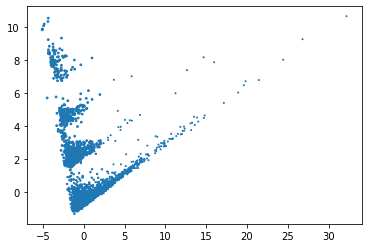

In [73]:
#plot 
#pca 
#cluster 

before["pca1"] = pcaData[:,0]
before["pca2"] = pcaData[:,1]
before["clusters from data"] = unsupervisedapproach.labels_

x = before["pca1"]
y = before["pca2"]
clusters = before["clusters from data"]

plt.scatter(x,y,clusters)
plt.show()

In [93]:
#all data
import pandas as pd
df2 = pd.read_csv (r'/Users/nicholeetienne/Downloads/Patientsatalllevels.csv')
print (df2)

         icustay_id            charttime  creat  aki_stage_creat  uo_rt_6hr  \
0            200001  2181-11-25 22:02:00    NaN              NaN     4.0984   
1            200001  2181-12-01 06:15:00    3.3              0.0        NaN   
2            200001  2181-11-30 06:45:00    4.7              3.0        NaN   
3            200001  2181-11-26 20:47:00    NaN              NaN     0.9836   
4            200001  2181-12-02 05:30:00    3.9              1.0        NaN   
...             ...                  ...    ...              ...        ...   
3742977      268244  2126-09-11 10:00:00    NaN              NaN     2.3184   
3742978      268245  2145-11-15 21:06:00    1.0              0.0        NaN   
3742979      268245  2145-11-16 01:30:00    NaN              NaN     0.1562   
3742980      268245  2145-11-16 06:00:00    NaN              NaN     0.0959   
3742981      268245  2145-11-16 08:00:00    NaN              NaN     0.1562   

         uo_rt_12hr  uo_rt_24hr  aki_stage_uo  aki_

In [94]:
all= df2.drop(columns=['charttime'])
all

,icustay_id,creat,aki_stage_creat,uo_rt_6hr,uo_rt_12hr,uo_rt_24hr,aki_stage_uo,aki_stage
0,200001,NaN,NaN,4.0984,4.0984,4.0984,0.0,0
1,200001,3.3,0.0,NaN,NaN,NaN,NaN,0
2,200001,4.7,3.0,NaN,NaN,NaN,NaN,3
3,200001,NaN,NaN,0.9836,0.9836,0.2140,3.0,3
4,200001,3.9,1.0,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...
3742977,268244,NaN,NaN,2.3184,1.3910,2.2205,0.0,0
3742978,268245,1.0,0.0,NaN,NaN,NaN,NaN,0
3742979,268245,NaN,NaN,0.1562,0.1562,0.1562,0.0,0
3742980,268245,NaN,NaN,0.0959,0.0959,0.0959,2.0,2


In [95]:
all = all.dropna(axis=0)

In [96]:
all

,icustay_id,creat,aki_stage_creat,uo_rt_6hr,uo_rt_12hr,uo_rt_24hr,aki_stage_uo,aki_stage
164,200007,0.8,0.0,0.8201,0.8201,0.8201,0.0,0
629,200030,0.9,0.0,0.5575,0.6089,0.7336,0.0,0
676,200030,0.8,0.0,0.9859,1.0600,1.4869,0.0,0
775,200033,0.6,0.0,1.1507,1.6553,1.5126,0.0,0
788,200033,0.6,0.0,2.0832,1.7066,1.4384,0.0,0
...,...,...,...,...,...,...,...,...
3742440,268228,0.7,0.0,1.1176,0.8272,0.8272,0.0,0
3742628,268233,0.7,0.0,9.6358,8.8174,11.4367,0.0,0
3742641,268233,0.6,0.0,8.3910,9.1286,9.3188,0.0,0
3742644,268233,0.7,0.0,3.3426,6.7888,7.9587,0.0,0


In [98]:
from sklearn.preprocessing import StandardScaler

scalingdata = StandardScaler()
sscale = scalingdata.fit_transform(all)

#required library 
from sklearn.decomposition import PCA
# pca for number of componets 
pca = PCA(n_components = 6)
pca.fit(sscale)
pcaData = pca.transform(sscale)
pcaData

array([[ 0.16828967, -1.13456655, -1.77604932,  0.19867841, -0.18365964,
         0.05476069],
       [ 0.01714159, -1.22555206, -1.77723034,  0.26845665, -0.1440982 ,
         0.01116159],
       [ 0.44843443, -0.89251696, -1.77171778,  0.14682262, -0.16566168,
        -0.13422748],
       ...,
       [ 6.25233434,  4.0640724 ,  0.67423538, -1.04938954,  0.21297015,
        -1.04017473],
       [ 4.23602651,  2.29178614,  0.63107469, -0.65022591,  0.1105613 ,
        -2.2337506 ],
       [ 0.8370306 , -0.67564637,  0.57998472, -0.04876684, -0.11688284,
        -0.78408863]])

In [99]:
#unsupervised learning approach : Kmeans 
#required library 
from sklearn.cluster import KMeans
unsupervisedapproach = KMeans(n_clusters = 4)
unsupervisedapproach.fit(pcaData)

KMeans(n_clusters=4)

<ipython-input-91-027e44e62f12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all["pca1"] = pcaData[:,0]
<ipython-input-91-027e44e62f12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all["pca2"] = pcaData[:,1]
<ipython-input-91-027e44e62f12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

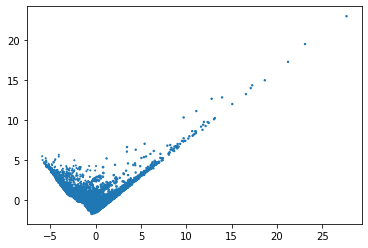

In [91]:
all["pca1"] = pcaData[:,0]
all["pca2"] = pcaData[:,1]
all["clusters from data"] = unsupervisedapproach.labels_

x = all["pca1"]
y = all["pca2"]
clusters = all["clusters from data"]

plt.scatter(x,y,clusters)
plt.show()